## Final Project Submission


* Student name: __Eva Mwende Kiio__
* Student pace:  __part time__
* Scheduled project review date/time: __July 2023__

## Project Overview

__Business Problem:__ Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

__The Goal:__ We approach this by applying exploratory data analysis to generate insights for a business stakeholder. Data will be drawn from the following sources: IMDBLinks to an external site and The NumbersLinks to an external site.
From these we acquired the following data frames;`imdb_title_df`, `imdb_title_rating_df` and `tn_df` that will be analysed and conclusions drawn from findings that will generate recommendations for the stake holders.

__Study Areas:__ The items below will be the focus of our analysis in an effort to provide guidance to stakeholders on trends in the film industry.
* __Item 1:__ Genre of movies most produced in the last 10 years
* __Item 2:__ The top most rated movies in the last 10 years
* __Item 3:__ Common charcteristics of top rated movies in the last 10 years
* __Item 4:__ Profit trends over the past 10 years domestically and world wide.

### Setting Up the Workspace

* Importing necessary libraries
* Loading up data to be used in analysis.

    __NB:__  The dataframes `imdb_title_df`, `imdb_title_rating_df` and `tn_df` were sourced from The Internet Movie Database (IMDb) and The Numbers websites.

In [2]:
#Install Libraries 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load and view the first set of data from IMDb: "imdb.title.basics.csv.gz"
imdb_title_df = pd.read_csv("WorkingData\imdb.title.basics.csv.gz")
imdb_title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#Load and view the second set of data from IMDb: "imdb.title.basics.csv.gz"
imdb_title_rating_df = pd.read_csv("WorkingData\imdb.title.ratings.csv.gz")
imdb_title_rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
#Load and view the third set of data from The Numbers: "rt.movie_info.tsv.gz"
tn_df = pd.read_csv("WorkingData/tn.movie_budgets.csv.gz")
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Item 1: Genre of movies most produced in the last 10 years
This segment gives a overview of the movie genre most produced in the last 10 years from the latest year entry in the imdb_df dataframe. This segment will include:

* Data cleaning
* Identifying the latest year entry
* Filtering the data to contain entries of the needed 10 years
* Find the count of genre per year
* Visual representation of the result.

In [6]:
#Looking at the structure of the dataframe from IMDb website
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


__The IMDb DataFrame contains:__
* 146144 rows and 6 columns (tconst', 'primary_title', 'original_title', 'start_year','runtime_minutes', 'genres')
* missing values at the `original_title`, `runtime_minutes` and `genres`columns
* Columns of data type object, int and float.

In [7]:
# drop the columns that are of no importance to this analysis
genre_df = imdb_title_df.drop(['original_title', 'tconst', 'runtime_minutes', 'primary_title'], axis=1)
genre_df

,start_year,genres
0,2013,"Action,Crime,Drama"
1,2019,"Biography,Drama"
2,2018,Drama
3,2018,"Comedy,Drama"
4,2017,"Comedy,Drama,Fantasy"
...,...,...
146139,2019,Drama
146140,2015,Documentary
146141,2013,Comedy
146142,2017,NaN


In [8]:
# Look at the stuscture of our filtered data frame
genre_df.shape

(146144, 2)

In [9]:
#Identify the number of missing values per column
genre_df.isna().sum()

start_year       0
genres        5408
dtype: int64

In [10]:
# We drop the missing values. out of 146144 rows 5408 rows under the genres column contain missing values 
# an insignificant amount compared to what will remain.

genre_df.dropna(subset = ['genres'], inplace = True)

In [11]:
#confirm
genre_df.isna().sum()

start_year    0
genres        0
dtype: int64

In [12]:
#Filter the data so that we have data on the last 10 years alone.
filtered_df = genre_df[(genre_df['start_year'] >= 2010) & (genre_df['start_year'] <= 2020)]
filtered_df.sort_values('start_year', ascending = False)

,start_year,genres
136826,2020,Drama
4858,2020,Drama
131467,2020,Crime
136016,2020,"Animation,Drama,Fantasy"
2325,2020,Thriller
...,...,...
14517,2010,"Action,Comedy,Romance"
14516,2010,"Biography,Documentary,News"
14515,2010,"Drama,Horror,Mystery"
14514,2010,Drama


In [13]:
# Calculate the number of movies for each genre per year
genre_counts_per_year = filtered_df.explode('genres').groupby(['start_year', 'genres']).size().reset_index(name='count')
genre_counts_per_year.head()

,start_year,genres,count
0,2010,Action,158
1,2010,"Action,Adventure",10
2,2010,"Action,Adventure,Animation",11
3,2010,"Action,Adventure,Biography",1
4,2010,"Action,Adventure,Comedy",20


In [14]:
# Find the maximum count of genre per year
max_count_per_year = genre_counts_per_year.groupby('start_year')['count'].max().reset_index()
max_genre_counts_per_year = pd.merge(genre_counts_per_year, max_count_per_year, on=['start_year', 'count'])
max_genre_counts_per_year

,start_year,genres,count
0,2010,Documentary,2507
1,2011,Documentary,2649
2,2012,Documentary,2721
3,2013,Documentary,2561
4,2014,Documentary,2805
5,2015,Documentary,3836
6,2016,Documentary,4405
7,2017,Documentary,4644
8,2018,Documentary,4196
9,2019,Documentary,1782


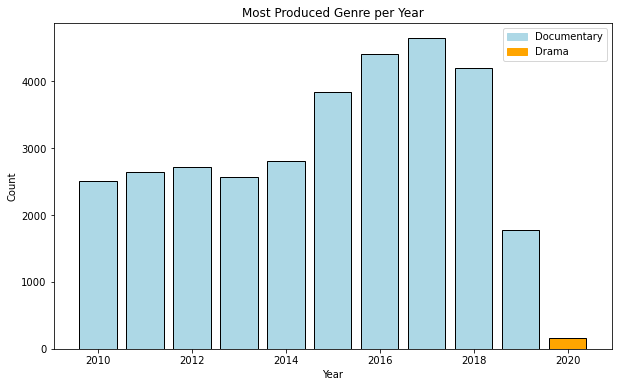

In [24]:
# visual representation of the most produced genres over the years

plt.figure(figsize=(10, 6))
colors = ['lightblue'] * (len(max_genre_counts_per_year) - 1) + ['orange']
plt.bar(max_genre_counts_per_year['start_year'], max_genre_counts_per_year['count'], color=colors, edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Most Produced Genre per Year')
legend_labels = ['Documentary', 'Drama']
plt.legend(legend_labels)

plt.show()


## Item 2: The top most rated movies in the last 10 years

This segment gives a overview of the movie genre most produced in the last 10 years from the latest year entry in the imdb_df dataframe. This segment will include:

* Data cleaning
* Identifying the latest year entry
* Filtering the data to contain entries of the needed 10 years
* Find the highest rated movies in the last 10nyears
* Visual representation of the result.

In [25]:
# since we want to find out the rating per movie title we will need to combine two data frames i.e. imdb_title_df, imdb_title_rating_df
imdb_combined_df = pd.merge(imdb_title_df, imdb_title_rating_df, on='tconst', how='outer')
imdb_combined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


#### Data Cleaning

In [26]:
# Check the structure of the table
imdb_combined_df.shape

(146144, 8)

In [27]:
# Drop the columns that we will not need for this analysis 
imdb_combined_df.drop(['tconst', 'original_title'], axis =1, inplace = True )
imdb_combined_df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,6 Gunn,2017,116.0,NaN,NaN,NaN


In [28]:
#Check for missing values
imdb_combined_df.isna().sum()

primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [29]:
#Drop all the null values
imdb_combined_df.dropna(inplace = True)
imdb_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 146134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    65720 non-null  object 
 1   start_year       65720 non-null  int64  
 2   runtime_minutes  65720 non-null  float64
 3   genres           65720 non-null  object 
 4   averagerating    65720 non-null  float64
 5   numvotes         65720 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.5+ MB


#### Filter Data According to Year


In [30]:
# Find the latest year entry
imdb_combined_df['start_year'].max()

2019

In [31]:
#Find the earliest year entry
imdb_combined_df['start_year'].min()

2010

In [32]:
# Group the DataFrame by year
grouped_movies = imdb_combined_df.groupby(['start_year'])

In [33]:
# Lets find the most highly rated movies over the years

highest_rated_movies = pd.DataFrame(columns=imdb_combined_df.columns)# Initialize an empty DataFrame 'highest_rated_movies' to store the highest-rated movie per year

for year, group in grouped_movies:
    x = group[group['averagerating'] == group['averagerating'].max()]
    highest_rated_movies = highest_rated_movies.append(x)
highest_rated_movies

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
16767,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5.0
14041,Road Dogs,2011,85.0,"Comedy,Documentary,Drama",9.4,9.0
21167,The Harvest,2011,83.0,Documentary,9.4,10.0
27322,María en tierra de nadie,2011,86.0,Documentary,9.4,5.0
30298,Voiceless,2011,43.0,"Documentary,Drama",9.4,5.0
66737,Bahêa Minha Vida: O Filme,2011,100.0,"Documentary,Sport",9.4,20.0
44279,Hercule contre Hermès,2012,72.0,Documentary,10.0,5.0
59326,Send My Mail to Nashville,2013,96.0,"Biography,Documentary,Music",9.8,5.0
67922,Maasai 10th Lost Tribe of Israel,2014,61.0,"Biography,Documentary,Drama",9.8,5.0
71954,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0


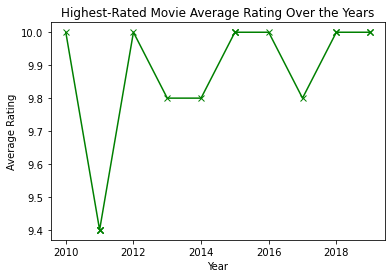

In [34]:
# Lets see the visual representation of these findings using a line plot
plt.plot(highest_rated_movies['start_year'], highest_rated_movies['averagerating'], color= 'green', marker='x')
plt.title('Highest-Rated Movie Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')

plt.show()



## Item 3: Common charcteristics of top rated movies in the last 10 years
* Is there any relation between Run time and rating 
* What are the top most rated films over the years

__Is there any relation between Run time and rating?__

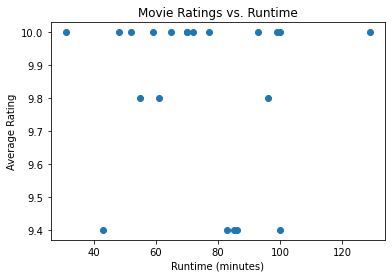

In [35]:
# Check the relation between runtime and movie rating.
plt.scatter(highest_rated_movies['runtime_minutes'], highest_rated_movies['averagerating'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Ratings vs. Runtime')

plt.show()

"""
From the data above, majority of the highest rated movies have a running time that lies between 50 to 80 minutes.
"""

__What are the top most rated films over the years?__

In [36]:
# Split the genres column into individual genre tags
highest_rated_movies['genres'] = highest_rated_movies['genres'].str.split(',')

# Create a new DataFrame by duplicating rows for each genre tag
df_genres = highest_rated_movies.explode('genres')
print(df_genres['genres'].unique())

['Crime' 'Documentary' 'Comedy' 'Drama' 'Sport' 'Biography' 'Music'
 'History' 'Adventure']


## Item 4: Top most profitable films in the last 10 years.
* Data Cleaning
* Trend in Domestic profit over the years
* Trend of worldwide profits over the years
* How do the two markets compare interms of profits

In [37]:
# Re-look The Numbers DataFrame (tn_df)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
#Check the structure of the data set
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [39]:
tn_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

__The Nmbers DataFrame contains:__
* No null values
* 5782 rows and 6 columns ('id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross')
* All the column are of type object apart from the 'id' column which is of type int.
* No missing values 

In [40]:
tn_df['release_date']=pd.to_datetime(tn_df['release_date']).dt.year
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [41]:
# The latest year entry 
tn_df['release_date'].max()

2020

In [42]:
# The earliest year entry
tn_df['release_date'].min()

1915

In [43]:
# Since the columns 'production_budget', 'domestic_gross' and 'worldwide_gross'are type object we need convert them into floats
tn_df['production_budget'] = tn_df['production_budget'].replace('[$,]', '', regex=True).astype(float)
tn_df['domestic_gross'] = tn_df['domestic_gross'].replace('[$,]', '', regex=True).astype(float)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].replace('[$,]', '', regex=True).astype(float)
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   int64  
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 271.2+ KB


In [44]:
# Lets see the number of rows with value 0.0 from the columns 'production_budget', 'domestic_gross'and  'worldwide_gross'
# Check the number of rows with 0.0 value in 'domestic_gross' and 'worldwide_gross' columns
num_zeros_domestic = (tn_df['domestic_gross'] == 0.0).sum()
num_zeros_worldwide = (tn_df['worldwide_gross'] == 0.0).sum()
num_zeros_production = (tn_df['production_budget'] == 0.0).sum()

print("Number of rows with 0.0 value in 'domestic_gross':", num_zeros_domestic)
print("Number of rows with 0.0 value in 'worldwide_gross':", num_zeros_worldwide)
print("Number of rows with 0.0 value in 'production_budget':", num_zeros_production)

Number of rows with 0.0 value in 'domestic_gross': 548
Number of rows with 0.0 value in 'worldwide_gross': 367
Number of rows with 0.0 value in 'production_budget': 0


In [45]:
# Lets drop all the rows with 0.0 in 'domestic_gross'and  'worldwide_gross' columns
tn_df = tn_df[(tn_df['domestic_gross'] != 0.0) & (tn_df['worldwide_gross'] != 0.0)]
tn_df.sort_values('release_date', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3795,96,2019,The Sun is Also a Star,9000000.0,4950029.0,5434029.0
2520,21,2019,What Men Want,20000000.0,54611903.0,69911903.0
1380,81,2019,John Wick: Chapter 3 â Parabellum,40000000.0,141744320.0,256498033.0
393,94,2019,Wonder Park,100000000.0,45216793.0,115149422.0
4534,35,2019,Late Night,4000000.0,246305.0,246305.0
...,...,...,...,...,...,...
5606,7,1925,The Big Parade,245000.0,11000000.0,22000000.0
4569,70,1925,Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0
5683,84,1920,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0
5614,15,1916,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0


In [46]:
#Lets calculate the trend of domestic profit over the last 10 years (2010-2020)
#Filter the data to have only data from 2010 to 2020
filtered_tn_df= tn_df[(tn_df['release_date'] >= 2010) & (tn_df['release_date'] <= 2019)]
filtered_tn_df.sort_values('release_date', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2460,61,2019,Pet Sematary,21000000.0,54724696.0,109501146.0
3871,72,2019,The Intruder,8000000.0,35095904.0,36005871.0
2499,100,2019,Glass,20000000.0,111035005.0,245303505.0
2487,88,2019,Us,20000000.0,175006930.0,254210310.0
840,41,2019,A Dogâs Way Home,61000000.0,41952715.0,81149689.0
...,...,...,...,...,...,...
4916,17,2010,Inside Job,2000000.0,4311834.0,7799257.0
969,70,2010,Resident Evil: Afterlife,57500000.0,60128566.0,295874190.0
3907,8,2010,Another Year,8000000.0,3205706.0,20005613.0
907,8,2010,Edge of Darkness,60000000.0,43313890.0,82812456.0


In [54]:
#lets find the domestic and world wide i.e. (profit = gross - budget)
filtered_tn_df.loc[:, 'domestic_profit'] = filtered_tn_df['domestic_gross'] - filtered_tn_df['production_budget'] # By using .loc, you are explicitly stating that you want to set the values on the original DataFrame, not on a temporary slice. 
filtered_tn_df.loc[:, 'worldwide_profit'] = filtered_tn_df['worldwide_gross'] - filtered_tn_df['production_budget']
filtered_tn_df.sort_values('release_date', ascending=False)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
2460,61,2019,Pet Sematary,21000000.0,54724696.0,109501146.0,33724696.0,88501146.0
407,8,2019,The LEGO Movie 2: The Second Part,99000000.0,105806508.0,190325698.0,6806508.0,91325698.0
1380,81,2019,John Wick: Chapter 3 â Parabellum,40000000.0,141744320.0,256498033.0,101744320.0,216498033.0
255,56,2019,How to Train Your Dragon: The Hidden World,129000000.0,160791800.0,519258283.0,31791800.0,390258283.0
121,22,2019,Dumbo,170000000.0,113883318.0,345004422.0,-56116682.0,175004422.0
...,...,...,...,...,...,...,...,...
2988,89,2010,The Yellow Handkerchief,15500000.0,318623.0,318623.0,-15181377.0,-15181377.0
2996,97,2010,The Kingâs Speech,15000000.0,138797449.0,430821168.0,123797449.0,415821168.0
3661,62,2010,Io sono lâamore,10000000.0,5005465.0,15121528.0,-4994535.0,5121528.0
3012,13,2010,Diary of a Wimpy Kid,15000000.0,64003625.0,76954311.0,49003625.0,61954311.0


In [55]:
# domestic filtered data 
domestic_filtered_tn_df = filtered_tn_df[['release_date', 'domestic_profit']].copy()
domestic_filtered_tn_df

,release_date,domestic_profit
2460,2019,33724696.0
1370,2019,16342725.0
95,2019,251525952.0
2499,2019,91035005.0
2487,2019,155006930.0
...,...,...
4916,2010,2311834.0
969,2010,2628566.0
3907,2010,-4794294.0
907,2010,-16686110.0


In [56]:
# Find the movie with the maximum profitability domestically
max_domestic_profit_df = domestic_filtered_tn_df.groupby('release_date')['domestic_profit'].max().reset_index()
max_domestic_profit_df

,release_date,domestic_profit
0,2010,232531751.0
1,2011,256193157.0
2,2012,398279547.0
3,2013,294668047.0
4,2014,292126372.0
5,2015,630662225.0
6,2016,332177324.0
7,2017,344014165.0
8,2018,500059566.0
9,2019,251525952.0


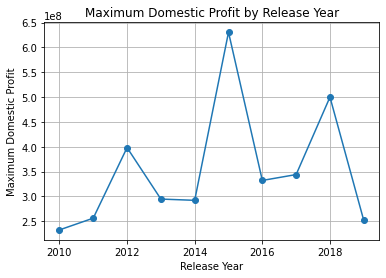

In [57]:
# Visualization of the profit changes over the years
plt.plot(max_domestic_profit_df['release_date'], max_domestic_profit_df['domestic_profit'], marker = 'o')
plt.xlabel('Release Year')
plt.ylabel('Maximum Domestic Profit')
plt.title('Maximum Domestic Profit by Release Year')
plt.grid(True)
plt.show()

In [58]:
filtered_tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
2460,61,2019,Pet Sematary,21000000.0,54724696.0,1.095011e+08,33724696.0,88501146.0
1370,71,2019,Rocketman,41000000.0,57342725.0,1.086427e+08,16342725.0,67642725.0
95,96,2019,Captain Marvel,175000000.0,426525952.0,1.123062e+09,251525952.0,948061550.0
2499,100,2019,Glass,20000000.0,111035005.0,2.453035e+08,91035005.0,225303505.0
2487,88,2019,Us,20000000.0,175006930.0,2.542103e+08,155006930.0,234210310.0


In [59]:
# worlwide filtered data 
worldwide_filtered_tn_df = filtered_tn_df[['release_date', 'worldwide_profit']].copy()
worldwide_filtered_tn_df

,release_date,worldwide_profit
2460,2019,88501146.0
1370,2019,67642725.0
95,2019,948061550.0
2499,2019,225303505.0
2487,2019,234210310.0
...,...,...
4916,2010,5799257.0
969,2010,238374190.0
3907,2010,12005613.0
907,2010,22812456.0


In [60]:
# Find the movie with the maximum profitability worldwide
max_worldwide_profit_df = worldwide_filtered_tn_df.groupby('release_date')['worldwide_profit'].max().reset_index()
max_worldwide_profit_df

,release_date,worldwide_profit
0,2010,8.688795e+08
1,2011,1.216693e+09
2,2012,1.292936e+09
3,2013,1.122470e+09
4,2014,8.940391e+08
5,2015,1.747311e+09
6,2016,8.900694e+08
7,2017,1.099200e+09
8,2018,1.748134e+09
9,2019,9.480616e+08


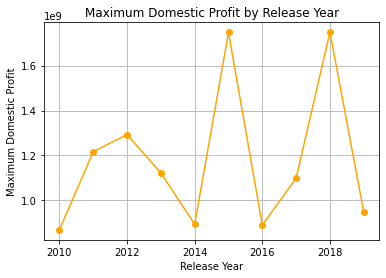

In [61]:
#Visualize findings

plt.plot(max_worldwide_profit_df['release_date'], max_worldwide_profit_df['worldwide_profit'], color = 'orange', marker = 'o')
plt.xlabel('Release Year')
plt.ylabel('Maximum Domestic Profit')
plt.title('Maximum Domestic Profit by Release Year')
plt.grid(True)
plt.show()

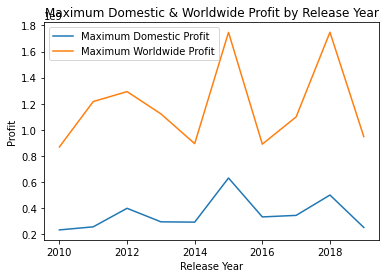

In [62]:
# Lets compare both graphs to see how the profits compare to the domestic and international market.
fig, ax = plt.subplots()

# Plot the maximum domestic profit as a line graph
ax.plot(max_domestic_profit_df['release_date'], max_domestic_profit_df['domestic_profit'], label='Maximum Domestic Profit')

# Plot the maximum worldwide profit as a line graph
ax.plot(max_worldwide_profit_df['release_date'], max_worldwide_profit_df['worldwide_profit'], label='Maximum Worldwide Profit')

ax.set_xlabel('Release Year')
ax.set_ylabel('Profit')
ax.set_title('Maximum Domestic & Worldwide Profit by Release Year')
ax.legend()
plt.show()

# Conclusion
__Item 1:Genre of movies most produced in the last 10 years__

From the year 2010 t0 2019 the most common genre of movies produced were documentaries. We do see a slight shift in the year 202 where the dram genre takes prevelence.

__Item 2:The top most rated movies in the last 10 years__

Section two lists the most rated movies from the year 2010 to 2019 with rates ranging from 9.4 to 10.0

__Item 3:Common charcteristics of top rated movies in the last 10 years__

From the analysis in section two, we get to see how the top rated movies correlate with other aspects such as running time. It was noted that the top most rated movies had a runtime ranging from 40 to 80 minutes.

The top rated movies also belonged to the following genres 'Crime' 'Documentary' 'Comedy' 'Drama' 'Sport' 'Biography' 'Music' 'History' 'Adventure'. It is to be noted that a single movie could have more than one genre. It was noted that all movies did fall in the documentary category.

With the findings from Item 1 and the findings on item 3, we can see that the genre 'documentary' is the most prefered among the viewers and the producers

 __Item 4:Profit trends over the past 10 years domestically and world wide___

The findings show an up down in maximum profit gains over the years. It is to be noted that the domestic and international profits have almost the same trends. The peak years for both are 2015 and 2018. 

However a comparison of both shows that the international film market does bring in more revenue as compared to the domestic market over the years.

## Recommendations

* Microsoft should targert producing movies that lie in either of the following genres 'Crime' 'Documentary' 'Comedy' 'Drama' 'Sport' 'Biography' 'Music' 'History' 'Adventure' with a major focus on Documentaries

* The Microsoft film should have a runtime of between 40 to 80 minutes.

* Mircosoft should not only target having their film in the domestic market but also international one inorder to maximise on profit.

